<a href="https://colab.research.google.com/github/nipunarambukkanage/Sentiment_Analysis_Python_IMDB/blob/python/Sentiment_Analysis_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment analysis on the IMDb movie reviews dataset using Python

## Step 1: Import Libraries

Importing the necessary libraries:

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

## Step 2: Load and Explore the Dataset

Loading the dataset and explore it to understand its structure:

In [ ]:
# Load the dataset without specifying headers
data = pd.read_csv("/content/sample_data/IMDB Dataset.csv", header=None)

# Manually set the column names
data.columns = ['review', 'sentiment']

# Display the first few rows of the dataset
print(data.head())

                                              review  sentiment
0                                             review  sentiment
1  One of the other reviewers has mentioned that ...   positive
2  A wonderful little production. <br /><br />The...   positive
3  I thought this was a wonderful way to spend ti...   positive
4  Basically there's a family where a little boy ...   negative


The columns of the Table is given below

In [ ]:
print(data.columns)


Index(['review', 'sentiment'], dtype='object')


## Step 3: Data Preprocessing

Preprocessing the text data, including cleaning and transforming it into numerical features:

In [ ]:
# Clean and preprocess the text data

# Split the dataset into features and labels
X = data['review']
y = data['sentiment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Step 4: Feature Extraction

Convert the text data into numerical features using CountVectorizer:

In [ ]:
# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the training data
X_train_vectorized = vectorizer.fit_transform(X_train)

# Transform the test data
X_test_vectorized = vectorizer.transform(X_test)


## Step 5: Selecting the Best Classifier

In this step I am comparing different classifiers (Multinomial Naive Bayes, Logistic Regression, Random Forest and Decision Tree) and select the most efficient one for sentiment analysis

***Multinomial Naive Bayes classifier***

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Initialize and train Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_vectorized, y_train)

# Predict and evaluate
y_pred_nb = nb_classifier.predict(X_test_vectorized)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Multinomial Naive Bayes Classifier")
print(f'Accuracy: {accuracy_nb}')
print("Classification Report:")
print(classification_report(y_test, y_pred_nb))


Multinomial Naive Bayes Classifier
Accuracy: 0.8501149885011499
Classification Report:
              precision    recall  f1-score   support

    negative       0.83      0.88      0.85      4994
    positive       0.88      0.82      0.85      5007

    accuracy                           0.85     10001
   macro avg       0.85      0.85      0.85     10001
weighted avg       0.85      0.85      0.85     10001



***Logistic Regression classifier***

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize StandardScaler and fit to the training data
scaler = StandardScaler(with_mean=False)  # Sparse input, set with_mean=False
X_train_scaled = scaler.fit_transform(X_train_vectorized)

# Initialize and train Logistic Regression classifier with modified parameters
lr_classifier = LogisticRegression(solver='liblinear', max_iter=10000, C=0.1)
lr_classifier.fit(X_train_scaled, y_train)

# Scale the test data
X_test_scaled = scaler.transform(X_test_vectorized)

# Predict and evaluate
y_pred_lr = lr_classifier.predict(X_test_scaled)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Classifier")
print(f'Accuracy: {accuracy_lr}')
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))


Logistic Regression Classifier
Accuracy: 0.8746125387461254
Classification Report:
              precision    recall  f1-score   support

    negative       0.88      0.87      0.87      4994
    positive       0.87      0.88      0.88      5007

    accuracy                           0.87     10001
   macro avg       0.87      0.87      0.87     10001
weighted avg       0.87      0.87      0.87     10001



***Random Forest Classifier***

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Reduce the number of estimators and enable parallel processing
rf_classifier = RandomForestClassifier(n_estimators=100, n_jobs=-1)

# Train the model
rf_classifier.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_rf = rf_classifier.predict(X_test_scaled)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Classifier")
print(f'Accuracy: {accuracy_rf}')
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Classifier
Accuracy: 0.8549145085491451
Classification Report:
              precision    recall  f1-score   support

    negative       0.85      0.86      0.86      4994
    positive       0.86      0.85      0.85      5007

    accuracy                           0.85     10001
   macro avg       0.85      0.85      0.85     10001
weighted avg       0.85      0.85      0.85     10001



***Decision Tree Classifier***

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train Decision Tree classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_dt = dt_classifier.predict(X_test_scaled)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Classifier")
print(f'Accuracy: {accuracy_dt}')
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))


Decision Tree Classifier
Accuracy: 0.7333266673332667
Classification Report:
              precision    recall  f1-score   support

    negative       0.73      0.74      0.73      4994
    positive       0.73      0.73      0.73      5007

    accuracy                           0.73     10001
   macro avg       0.73      0.73      0.73     10001
weighted avg       0.73      0.73      0.73     10001



***Selecting the most accurate model***

In [ ]:
import pandas as pd

# Accuracy scores for each classifier
accuracy_scores = {
    'Decision Tree': accuracy_dt,
    'Naive Bayes': accuracy_nb,
    'Logistic Regression': accuracy_lr,
    'Random Forest': accuracy_rf,
}

# Create a DataFrame for the accuracy scores
accuracy_df = pd.DataFrame(list(accuracy_scores.items()), columns=['Classifier', 'Accuracy'])

# Find the most accurate model
most_accurate_model = accuracy_df.loc[accuracy_df['Accuracy'].idxmax()]

# Print the accuracy table
print("Accuracy Table:")
print(accuracy_df)

# Print the most accurate model
print("\nMost Accurate Model:")
print(most_accurate_model)


Accuracy Table:
            Classifier  Accuracy
0        Decision Tree  0.733327
1          Naive Bayes  0.850115
2  Logistic Regression  0.874613
3        Random Forest  0.854915

Most Accurate Model:
Classifier    Logistic Regression
Accuracy                 0.874613
Name: 2, dtype: object


## Step 6 : Developing the model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler

# Selected_classifier is Logistic Regression
selected_classifier = LogisticRegression(solver='liblinear', max_iter=20000)

# Fit the Logistic Regression model with the training data
X_train_vectorized = vectorizer.transform(X_train)
X_train_scaled = scaler.transform(X_train_vectorized)
selected_classifier.fit(X_train_scaled, y_train)

def predict_sentiment(review):
    # Vectorize the input review using the same vectorizer used during training
    review_vectorized = vectorizer.transform([review])

    # Scale the input review vector using the same scaler used during training
    review_scaled = scaler.transform(review_vectorized)

    # Predict the probabilities using the selected classifier
    probabilities = selected_classifier.predict_proba(review_scaled)

    # Calculate the percentage of positivity and negativity
    positivity_percentage = probabilities[0][1] * 100
    negativity_percentage = probabilities[0][0] * 100

    # Determine sentiment based on positivity_percentage and negativity_percentage
    if positivity_percentage > negativity_percentage:
        sentiment = 'Positive'
    else:
        sentiment = 'Negative'

    return sentiment, positivity_percentage, negativity_percentage

# Example usage:
user_review = input("Enter your movie review: ")
sentiment, positivity_percentage, negativity_percentage = predict_sentiment(user_review)

print(f"Predicted Sentiment: {sentiment}")
print(f"Positivity Percentage: {positivity_percentage:.2f}%")
print(f"Negativity Percentage: {negativity_percentage:.2f}%")


Enter your movie review: I think this movie is beautiful. I like the movie because it gives a good image about love.
Predicted Sentiment: Positive
Positivity Percentage: 85.77%
Negativity Percentage: 10.12%


## Step 7: Data Visualization

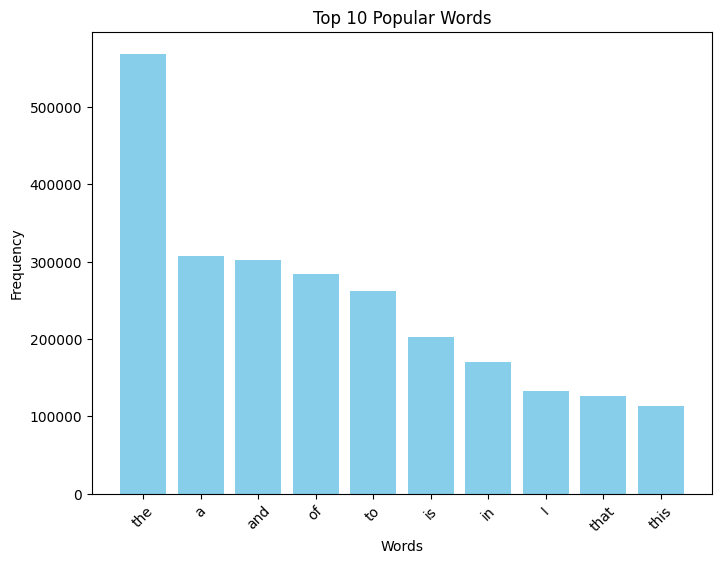

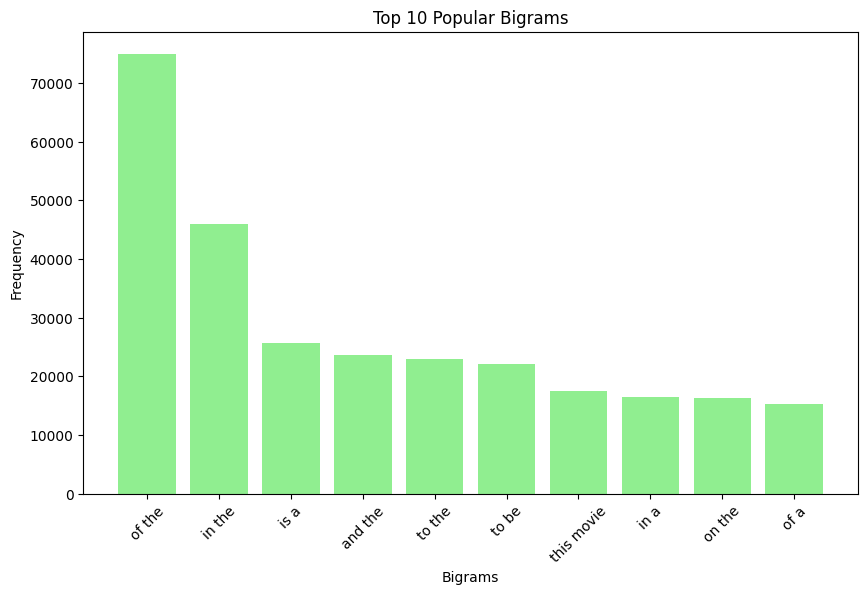

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt  # Import the matplotlib.pyplot module

# Tokenize the entire dataset (assuming X contains all reviews)
all_words = ' '.join(X)
tokens = all_words.split()

# Calculate word frequencies
word_counts = Counter(tokens)
top_10_words = dict(word_counts.most_common(10))

# Bar graph for top 10 popular words
plt.figure(figsize=(8, 6))
plt.bar(top_10_words.keys(), top_10_words.values(), color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Popular Words')
plt.xticks(rotation=45)
plt.show()

# Calculate bigram frequencies
bigrams = list(zip(tokens, tokens[1:]))
bigram_counts = Counter(bigrams)
top_10_bigrams = dict(bigram_counts.most_common(10))

# Bar graph for top 10 popular bigrams
plt.figure(figsize=(10, 6))
plt.bar([' '.join(bigram) for bigram in top_10_bigrams.keys()], top_10_bigrams.values(), color='lightgreen')
plt.xlabel('Bigrams')
plt.ylabel('Frequency')
plt.title('Top 10 Popular Bigrams')
plt.xticks(rotation=45)
plt.show()


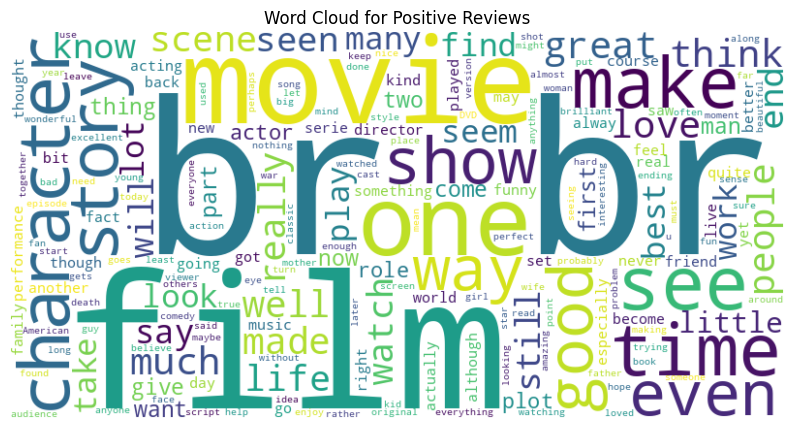

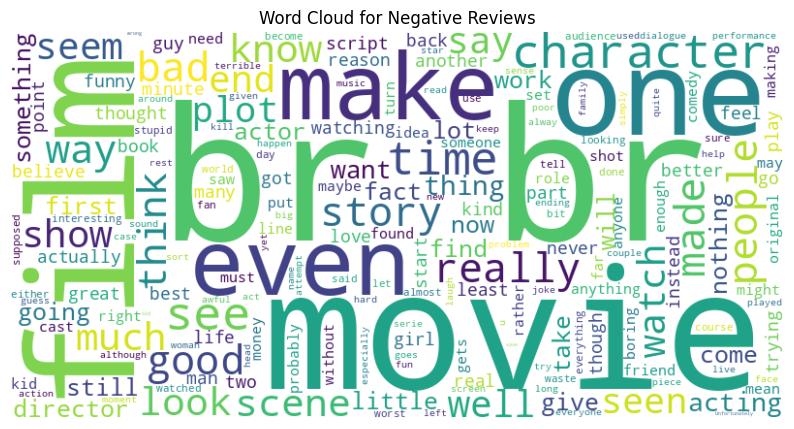

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Separate positive and negative reviews
positive_reviews = data[data['sentiment'] == 'positive']['review'].str.cat(sep=' ')
negative_reviews = data[data['sentiment'] == 'negative']['review'].str.cat(sep=' ')

# Create word cloud for positive reviews
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')
plt.show()

# Create word cloud for negative reviews
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Reviews')
plt.show()


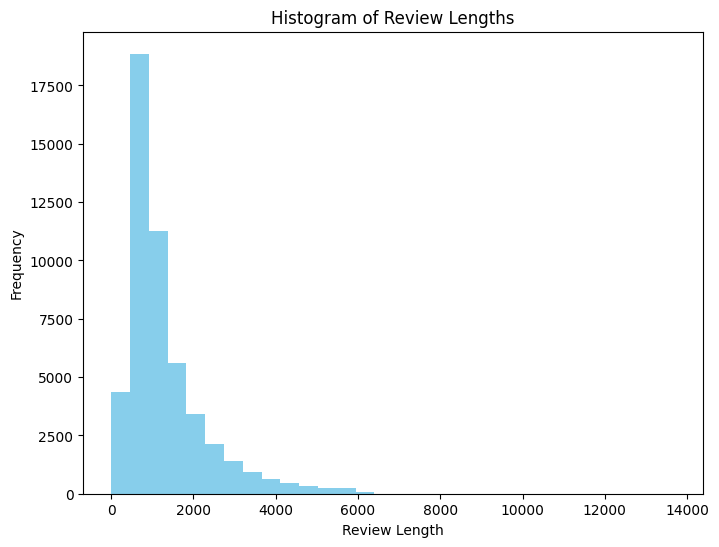

In [ ]:
# Calculate review lengths
data['review_length'] = data['review'].apply(len)

# Plot histogram of review lengths
plt.figure(figsize=(8, 6))
plt.hist(data['review_length'], bins=30, color='skyblue')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.title('Histogram of Review Lengths')
plt.show()


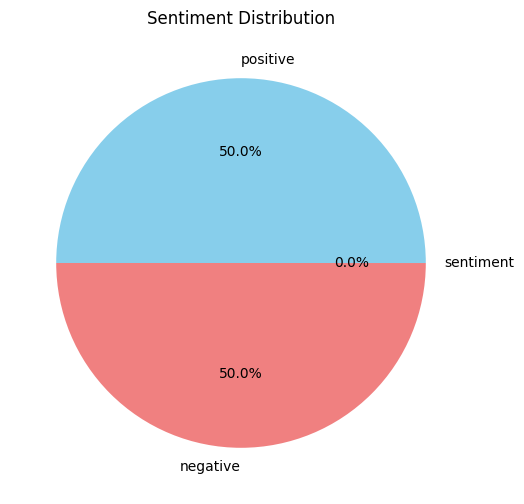

In [ ]:
# Count the number of positive and negative reviews
sentiment_counts = data['sentiment'].value_counts()

# Plot pie chart of sentiment distribution
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Sentiment Distribution')
plt.show()


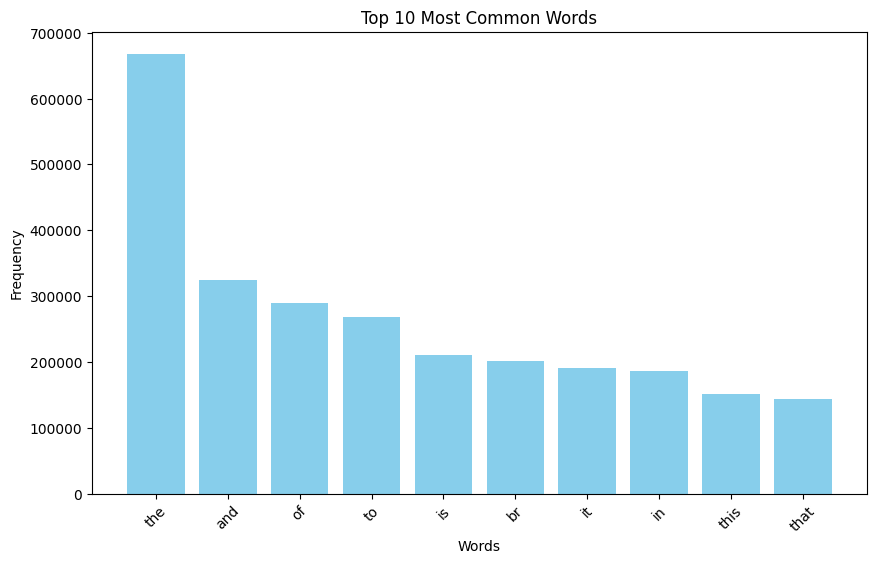

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Vectorize text data using CountVectorizer
vectorizer = CountVectorizer(max_features=1000)  # Set the number of top words to display
X_vectorized = vectorizer.fit_transform(data['review'])

# Get feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Calculate word frequencies
word_frequencies = X_vectorized.sum(axis=0).A1
word_frequency_dict = dict(zip(feature_names, word_frequencies))

# Get top N words
top_n_words = sorted(word_frequency_dict.items(), key=lambda x: x[1], reverse=True)[:10]

# Plot bar chart of top N words
plt.figure(figsize=(10, 6))
plt.bar([word[0] for word in top_n_words], [word[1] for word in top_n_words], color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Words')
plt.xticks(rotation=45)
plt.show()
